# 분포

### 균등 분포

### 초기하분포

### 이항

### 베르누이

### 다항분포

### 음이항분포

### 기하분포

### 포아송

### 감마분포

감마함수(Gamma function)는 아래와 같이 정의되고,
$$\Gamma(\alpha) = \int^{+\infty}_0 x^{\alpha-1} ~ e^{-x} ~ dx, ~ \alpha > 0$$
아래와 같은 성질을 갖는다.
$$\begin{align}
\Gamma(1) &= 1 \\
\Gamma(x+1) &= x \Gamma(x) \\
\Gamma(n+1) &= n!, ~ n \in \mathbb{Z}
\end{align}$$

감마분포를 따르는 확률변수 $X \sim \mathrm{Gamma}(\alpha, \beta)$의 확률밀도함수는 아래와 같다.

$$pdf_X(x) = \frac{1}{\Gamma(\alpha) \beta^{\alpha}}x^{\alpha - 1} ~ e^{-x/\beta} ~ \mathrm{I}_{(x>0)}, (\alpha > 0, \beta > 0)$$

이때 $\alpha$를 형상모수(shape parameter)라 하고, $\beta$를 척도모수(scale parameter)라 한다.    
또한 $X$의 기대값 $E(X)$은 $\alpha \beta$이고 분산 $Var(X)$은 $\alpha \beta^2$이다.

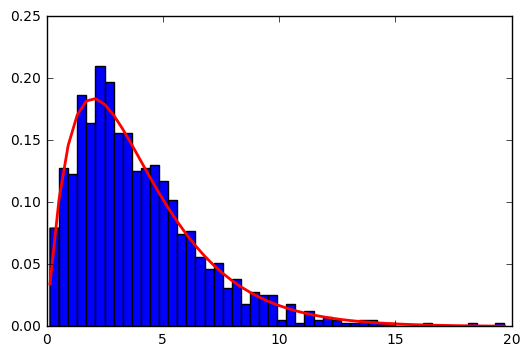

In [14]:
import numpy as np
shape, scale = 2., 2. # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)

import matplotlib.pyplot as plt
import scipy.special as sps
count, bins, ignored = plt.hist(s, 50, normed=True)
y = bins**(shape-1) * (np.exp(-bins/scale) / (sps.gamma(shape) * scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
plt.show()

### 베타분포

우선 감마함수를 조합하여 아래와 같은 베타함수 $B(\alpha_1, \alpha_2)$를 정의할 수 있다.
$$\begin{align}
B(\alpha_1, \alpha_2) &= \frac{\Gamma(\alpha_1) \Gamma(\alpha_2)}{\Gamma(\alpha_1 + \alpha_2)}\\
&= \int^1_0 x^{\alpha_1 - 1} (1-x)^{\alpha_2 - 1} dx\\
\end{align}$$

> 베타분포는 아래와 같이 정의 된다.
$$\begin{align} 
X \sim \mathrm{Beta}(\alpha_1, \alpha_2) &\Leftrightarrow X \,{\buildrel d \over \equiv}\, \frac{Z_1}{Z_1 + Z_2}, ~ Z_1 \sim \mathrm{Gamma}(\alpha_1, \beta), Z_2 \sim \mathrm{Gamma}(\alpha_2, \beta), ~ Z_1~ \mathrm{and} ~ Z_2~ \mathrm{are~ mutually~ independent} \\
&\Leftrightarrow pdf_X(x) = \frac{1}{B(\alpha_1, \alpha_2)} x^{\alpha_1 - 1} (1-x)^{\alpha_2 - 1} ~ I_{(0, 1)}(x)
\end{align}$$

이때 평균과 분산은 아래와 같다.
$$\begin{align}
E[X] &= \frac{\alpha_1}{\alpha_1 + \alpha_2} \\
Var[X] &= \frac{\alpha_1 \alpha_2}{(\alpha_1 + \alpha_2)^2 ~ (\alpha_1 + \alpha_2 + 1)} \\
\end{align}
$$

### 디리슈레분포(Dirichlet distribution)

베타분포가 압정의 머리가 $\alpha_1$번 꼬리가 $\alpha_2$번 나오는 이항 시행을 모형화 한다면          
디리슈레분포는 서로 다른 비율로 각 면이 나올 수 있는 주사위를 던지는 것과 같이 다항 시행을 모형화한 것이다.

> 아래 조건을 만족시키는 확률변수 $\mathbf{Y}=[Y_1, \cdots, Y_k]^t$에 대하여            
- $Y_i \geq 0$ for $i=1, \cdots, k$ 
- $\sum^k_{i=1}Y_i = 1$          

> 디리슈레분포를 다음과 같이 정의할 수 있다.

$$\begin{align}
\mathbf{Y} = [Y_1, \cdots, Y_k]^t &\sim \mathrm{Dirichlet}(\alpha_1, \cdots, \alpha_k) \\
\Leftrightarrow &pdf_{Y_1, \cdots, Y_k}(y_1, \cdots, y_k) \\
& =\frac{\Gamma(\alpha_1 + \cdots + \alpha_k)}{\prod^k_{i=1} \Gamma(\alpha_i)} \prod^k_{i=1} q_i^{\alpha_i - 1}
\end{align}$$

### 지수분포

### 정규분포

### 로지스틱 분포

### 이중지수 분포

### 코쉬 분포

### 웨이불 분포

# 이항 분포에 대한 베이지안 추론

$1$이 나올 확률이 $\theta$이고 $0$이 나올 확률이 $1-\theta$인 베르누이 시행의 결과를 확률변수 $X[m]$라 하고 ($m$번째 시행)     
이 시행을 $M$번 반복한 결과를 $x[1], \dots, x[M]$라 해 보자.            
또한 이때 $1$이 나온 횟수를 $M[1]$, 0이 나온 횟수를 $M[0]$이라 하자.

즉 $X[m]$의 확률 분포는 아래와 같고    
$$P(X[m]~|~\theta) = \begin{cases}
\theta & \mathrm{if}~ x[m]=x^1 \\
1-\theta & \mathrm{if}~ x[m]=x^0
\end{cases}$$
기호로는 아래와 같이 나타낼 수 있다.
$$X[m] \sim \mathrm{Bernoulli}(\theta)$$

앞으로의 논의를 위해 아래 두가지를 가정할 것이다.      
- [1] $\theta$를 확률변수이다. 즉 어떤 진리의 값이 존재하는 것이 아니라 증거에 따라 변할 수 있는 어떤 분포로 표현된다.)
- [2] 각 시행은 $\theta$가 주어져 있을 때 서로 독립이다.(conditionally independent given $\theta$)

.

### $\theta$의 사후분포

$\theta$의 사후분포는 아래와 같다.
$$P(\theta ~|~ x[1], \dots, x[m]) = \frac{P(x[1], \dots, x[M] ~|~ \theta) ~ P(\theta)}{P(x[1], \dots, x[M])}$$

이때 분자의 $P(x[1], \dots, x[M] ~|~ \theta)$는 우도함수(likelihood function)로서 가정 [2]에 의해 아래와 같이 factorize 된다.
$$\begin{align}
P(x[1], \dots, x[M] ~|~ \theta) &= \prod^M_{m=1} P(x[m] ~|~ \theta) \\
&= \theta^{M[1]} (1-\theta)^{M[0]}
\end{align}$$

분자의 $P(\theta)$는 $\theta$에 대한 사전분포이다. 사전분포로 다양한 분포를 사용할 수 있고, uniform 혹은 Beta 분포를 사용하는 경우에 대해 나중에 살펴보기로 한다.

분모의 $P(x[1], \dots, x[M])$는 normalizing factor로서 아래와 같이 계산할 수 있다. 
$$P(x[1], \dots, x[M]) = \int_{\theta} P(x[1], \dots, x[M] ~|~ \theta) ~ P(\theta) ~ d\theta$$

### 다음 시행에 대한 예측 분포

$M$번의 시행결과($x[1], \dots, x[M]$)가 주어져 있을 때 다음 시행($x[M+1]$)의 확률 분포는 아래와 같다.

$$\begin{align}
P(x[M+1] ~|~ x[1], \dots, x[M]) &= \int P(x[M+1] ~|~ \theta, x[1], \dots, x[M]) ~ P(\theta ~|~ x[1], \dots, x[M]) d\theta\\
&= \int P(x[M+1] ~|~ \theta) ~ P(\theta ~|~ x[1], \dots, x[M]) d\theta\\
\end{align}$$

$\theta$가 주어지면 $x[1], \dots, x[M]$과 $x[M+1]$은 서로 독립이므로       
위 식에서 $P(x[M+1] ~|~ \theta, x[1], \dots, x[M])$가 $P(x[M+1] ~|~ \theta)$로 축약되었다.   
(즉 $\theta$가 주어지는 순간 $x[1], \dots, x[M]$는 $x[M+1]$에 대한 추가적인 정보를 주지 못한다.)
 

###### Uniform prior

$\theta$의 사전분포로 다양한 분포를 사용할 수 있겠으나    
간단하게 구간 [0, 1]에서의 균등분포일 때 $P(x[M+1] ~|~ x[1], \dots, x[M])$를 구해보자.        
사전분포가 균등분포이면 $P(\theta ~|~ x[1], \dots, x[m])$는 아래와 같이 정규화된 우도함수(normalized likelihood function)이 된다.   
$$P(\theta ~|~ x[1], \dots, x[m]) = \frac{P(x[1], \dots, x[M] ~|~ \theta)}{P(x[1], \dots, x[M])}$$

여기에서 정규화 상수(normalizing constant) $P(x[1], \dots, x[M])$는 아래와 같이 계산할 수 있다.
$$\begin{align}
P(x[1], \dots, x[M]) &= \int P(x[1], \dots, x[M] ~|~ \theta) ~ P(\theta) ~ d\theta \\
&= \int \theta^{M[1]} ~ (1 - \theta)^{M[0]} \cdot 1 ~ d\theta \\
&= B(M[1]+1, M[0]+1)\\
\end{align}$$

위 식을 예측분포 식에 넣어 정리하면 아래와 같다.


$$\begin{align}
P(x[M+1] ~|~ x[1], \dots, x[M]) &= \int P(x[M+1] ~|~ \theta, x[1], \dots, x[M]) ~ P(\theta ~|~ x[1], \dots, x[M]) d\theta\\
&= \int P(x[M+1] ~|~ \theta) ~ P(\theta ~|~ x[1], \dots, x[M]) d\theta\\
&= \int P(x[M+1] ~|~ \theta) ~ \frac{P(x[1], \dots, x[M] ~|~ \theta) \cdot 1}{P(x[1], \dots, x[M])} \\
&= \int \theta \cdot \frac{\theta^{M[1]} ~ (1-\theta)^{M[0]}}{B(M[1]+1, M[0]+1)} ~ d\theta \\
&= E[\Theta], ~ \Theta \sim Beta(M[1]+1, M[0]+1) \\
&= \frac{M[1]+1}{M[1] + M[0] + 2}
\end{align}$$

###### Beta prior

$\theta$의 사전분포로 Beta 분포를 사용하는 경우($\theta \sim \mathrm{Beta}(\alpha_1, \alpha_0)$)를 살펴보자.

우선 정규화 상수는 아래와 같다.
$$\begin{align}
P(x[1], \dots, x[M]) &= \int P(x[1], \dots, x[M] ~|~ \theta) ~ P(\theta) ~ d\theta \\
&= \int \theta^{M[1]} ~ (1 - \theta)^{M[0]} \cdot \theta^{\alpha_1 -1} (1-\theta)^{\alpha_0 -1} ~ d\theta \\
&= B(M[1]+\alpha_1, M[0]+\alpha_0)\\
\end{align}$$

다음으로 예측 분포는 아래와 같다.

$$\begin{align}
P(x[M+1] ~|~ x[1], \dots, x[M]) &= \int P(x[M+1] ~|~ \theta, x[1], \dots, x[M]) ~ P(\theta ~|~ x[1], \dots, x[M]) d\theta\\
&= \int P(x[M+1] ~|~ \theta) ~ P(\theta ~|~ x[1], \dots, x[M]) d\theta\\
&= \int P(x[M+1] ~|~ \theta) ~ \frac{P(x[1], \dots, x[M] ~|~ \theta) ~ P(\theta)}{P(x[1], \dots, x[M])} \\
&= \int \theta \cdot \frac{\theta^{M[1]} ~ (1-\theta)^{M[0]} \cdot \theta^{\alpha_1 -1} (1-\theta)^{\alpha_0 -1} }{B(M[1]+\alpha_1, M[0]+\alpha_0)} ~ d\theta \\
&= E[\Theta], ~ \Theta \sim Beta(M[1]+\alpha_1, M[0]+\alpha_0) \\
&= \frac{M[1]+\alpha_1}{M[1] + M[0] + \alpha_1 + \alpha_0}
\end{align}$$

(사실 $\mathrm{Beta}(1, 1)$은 균등분포와 동일하다.)

.

.

.

.